In [1]:
import os

import keras

print("Keras = {}".format(keras.__version__))
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import seaborn as sns
import pandas as pd


# Print gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

# model_dir = './models/'
model_file = 'vit_brain_mri.keras'

Keras = 2.15.0
Num GPUs Available:  1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip -o /content/drive/MyDrive/dataset_19.zip

! pwd

Archive:  /content/drive/MyDrive/dataset_19.zip
   creating: dataset_19/glioma/
  inflating: dataset_19/glioma/Te-gl_0010.jpg  
  inflating: dataset_19/glioma/Te-gl_0016.jpg  
  inflating: dataset_19/glioma/Te-gl_0020.jpg  
  inflating: dataset_19/glioma/Te-gl_0026.jpg  
  inflating: dataset_19/glioma/Te-gl_0035.jpg  
  inflating: dataset_19/glioma/Te-gl_0041.jpg  
  inflating: dataset_19/glioma/Te-gl_0043.jpg  
  inflating: dataset_19/glioma/Te-gl_0044.jpg  
  inflating: dataset_19/glioma/Te-gl_0045.jpg  
  inflating: dataset_19/glioma/Te-gl_0057.jpg  
  inflating: dataset_19/glioma/Te-gl_0060.jpg  
  inflating: dataset_19/glioma/Te-gl_0075.jpg  
  inflating: dataset_19/glioma/Te-gl_0079.jpg  
  inflating: dataset_19/glioma/Te-gl_0085.jpg  
  inflating: dataset_19/glioma/Te-gl_0090.jpg  
  inflating: dataset_19/glioma/Te-gl_0107.jpg  
  inflating: dataset_19/glioma/Te-gl_0114.jpg  
  inflating: dataset_19/glioma/Te-gl_0125.jpg  
  inflating: dataset_19/glioma/Te-gl_0126.jpg  
  inflat

# Load the Data

In [4]:
# Data Directories
dir = "dataset_19/"
validation_dir = "Testing"

# Data Distribution

In [5]:
data_distribution_count = pd.Series(
    {curr_index: len(os.listdir(os.path.join(dir, curr_index))) for curr_index in os.listdir(dir)})

data_distribution_count

meningioma    120
pituitary     120
glioma        120
notumor       120
dtype: int64

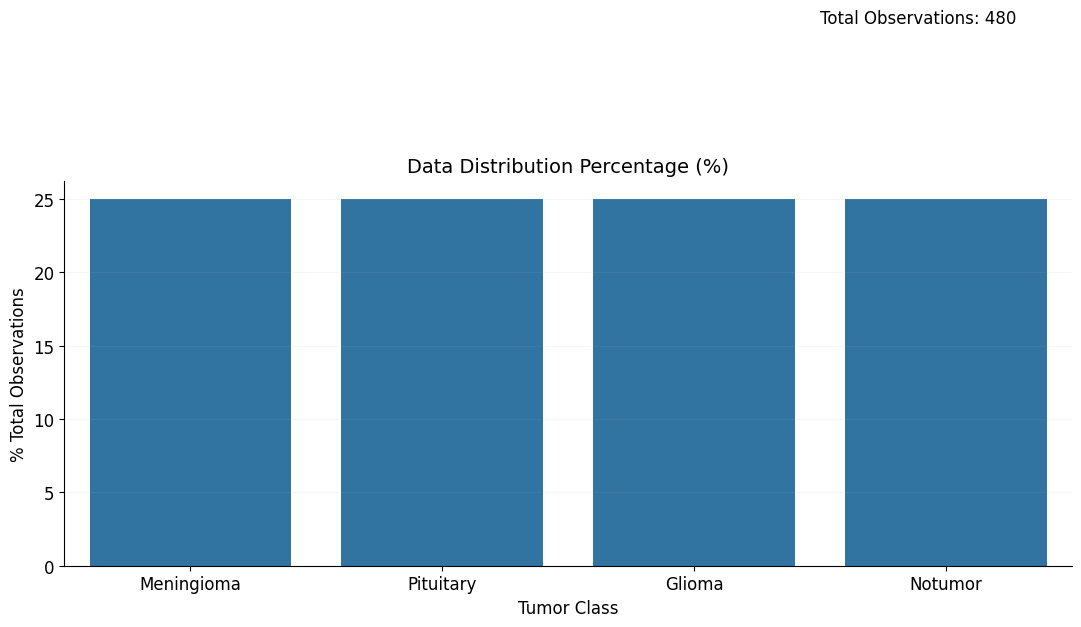

In [6]:
fig, axis = plt.subplots(figsize=(13, 5))
axis.grid(True, alpha=0.1)
axis.set_title("Data Distribution Percentage (%)", fontsize=14)
sns.barplot(x=['\n'.join(curr_index.strip().split('_')).title() for curr_index in data_distribution_count.index],
            y=100 * data_distribution_count / data_distribution_count.sum(), ax=axis)
axis.set_xlabel("Tumor Class", fontsize=12)
axis.set_ylabel("% Total Observations", fontsize=12)
axis.tick_params(which='major', labelsize=12)
axis.text(2.5, 37, f'Total Observations: {data_distribution_count.sum()}', fontdict=dict(size=12))
sns.despine()

# Splitting the Data

Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


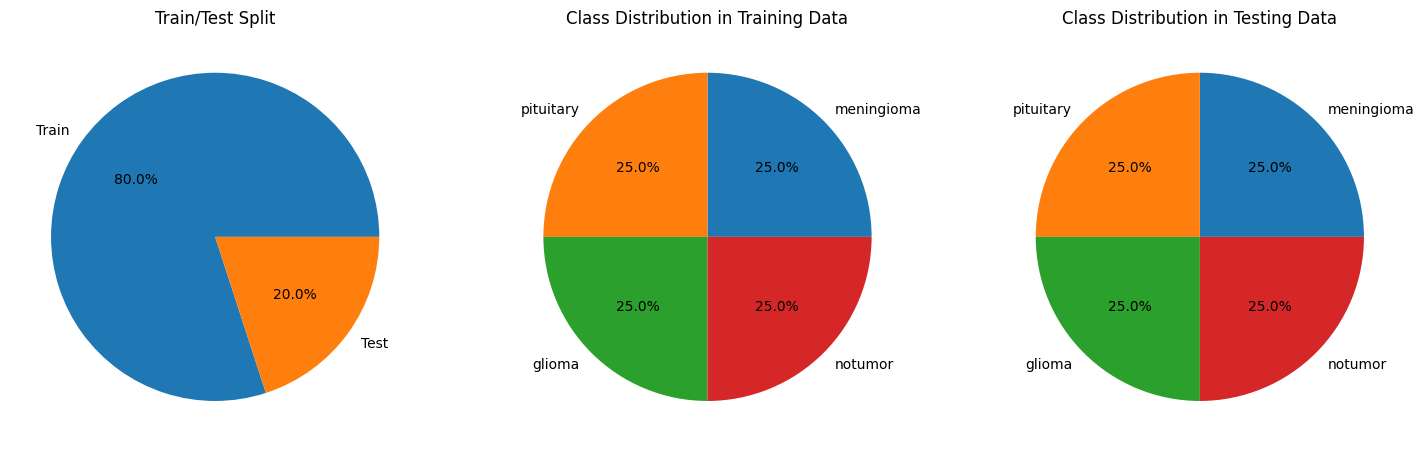

In [7]:
classes = os.listdir(dir)
batch_size = 16

train_datagen = ImageDataGenerator(
rescale=1. / 255,
rotation_range = 20,
horizontal_flip=True,
validation_split=0.2
)

# # Data Generators with more aggressive augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.2
# )

validation_datagen = ImageDataGenerator(rescale=1. / 255,
                                        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224, 224),
    batch_size=batch_size,
    seed=42,
    subset='training'
)

test_generator = validation_datagen.flow_from_directory(
    dir,
    target_size=(224, 224),
    batch_size=batch_size,
    seed=42,
    subset='validation')


print(test_generator.class_indices)

# Get the number of samples in the training and testing data
num_train_samples = train_generator.samples
num_test_samples = test_generator.samples

# Get the distribution of classes in the training and testing data
train_class_distribution = np.bincount(train_generator.classes)
test_class_distribution = np.bincount(test_generator.classes)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the train/test split
axes[0].pie([num_train_samples, num_test_samples], labels=['Train', 'Test'], autopct='%1.1f%%')
axes[0].set_title('Train/Test Split')

# Plot the distribution of classes in the training data
axes[1].pie(train_class_distribution, labels=classes, autopct='%1.1f%%')
axes[1].set_title('Class Distribution in Training Data')

# Plot the distribution of classes in the testing data
axes[2].pie(test_class_distribution, labels=classes, autopct='%1.1f%%')
axes[2].set_title('Class Distribution in Testing Data')

# Display the plots
plt.show()

# To Check Data Loading and Augmentation


In [8]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Installing TensorFlow Addon and vit-keras Package

In [9]:
! pip install tensorflow-addons vit-keras
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.9 MB/s eta 0:00:00


# Training a Vision Transformer (ViT) model



In [28]:
from transformers import ViTForImageClassification, ViTConfig, ViTModel
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit, layers
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import optuna
from tensorflow.keras.regularizers import l2


# # Function to create ViT model
# def create_vit_model(input_shape, num_classes, learning_rate, dropout_rate, l2_reg):
#     vit_model = vit.vit_b16(
#         image_size=224,
#         pretrained=True,
#         include_top=True,
#         pretrained_top=False,
#         classes=num_classes
#     )

#     inputs = Input(shape=input_shape, dtype=tf.float32)
#     outputs = vit_model(inputs)
#     outputs = Dropout(dropout_rate)(outputs)  # Use variable dropout rate
#     outputs = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(l2_reg))(outputs)
#     model = Model(inputs, outputs)
#     model = Model(inputs, outputs)
#     model.compile(optimizer=Adam(learning_rate=learning_rate),  # Use variable learning rate
#                   loss=CategoricalCrossentropy(from_logits=True),
#                   metrics=['accuracy'])
#     return model


## *** BETTER LEARNING CURVE BUT BAD CM ***

def create_vit_model(input_shape, num_classes, learning_rate, dropout_rate, l2_reg):
    # Load the pretrained ViT model
    vit_model = vit.vit_b16(
        image_size=224,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=num_classes
    )

    # Freeze the pretrained layers
    for layer in vit_model.layers:
        layer.trainable = False  # Freezing the layer

    # Create new input layer
    inputs = Input(shape=input_shape, dtype=tf.float32)
    # Pass inputs through the ViT model
    x = vit_model(inputs)

    # Add new layers
    x = Dropout(dropout_rate)(x)  # Use variable dropout rate
    x = Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)

    # Create the final model
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# def create_vit_model(input_shape, num_classes, learning_rate, dropout_rate, l2_reg, freeze=True):
#     vit_model = vit.vit_b16(
#         image_size=224,
#         pretrained=True,
#         include_top=True,
#         pretrained_top=False,
#         classes=num_classes
#     )

#     # Freeze the pretrained layers
#     if freeze:
#         for layer in vit_model.layers:
#             layer.trainable = False   # Freezing the layer

#     inputs = Input(shape=input_shape, dtype=tf.float32)
#     outputs = vit_model(inputs)
#     outputs = Dropout(dropout_rate)(outputs)  # Use variable dropout rate
#     outputs = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(l2_reg))(outputs)
#     model = Model(inputs, outputs)
#     model.compile(optimizer=Adam(learning_rate=learning_rate),  # Use variable learning rate
#                   loss=CategoricalCrossentropy(from_logits=True),
#                   metrics=['accuracy'])
#     return model

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
    l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-3)

    # Create the model
    model = create_vit_model((224, 224, 3), len(classes), learning_rate, dropout_rate, l2_reg)

    # Callbacks
    checkpoint = ModelCheckpoint(model_file, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)

    # Class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    # Training
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=50,
        validation_data=test_generator,
        validation_steps=test_generator.samples // test_generator.batch_size,
        callbacks=[checkpoint, early_stopping, reduce_lr],
        class_weight=class_weights
    )

    # Load the best weights before returning the final validation loss
    model.load_weights(model_file)

    # Store the training history in the trial
    trial.set_user_attr('history', history.history)

    # Evaluate the model with the best weights on the validation set
    val_loss = model.evaluate(test_generator, steps=test_generator.samples // batch_size, verbose=0)[0]

    return val_loss

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Best trial results
print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

history = trial.user_attrs['history']

[I 2024-06-07 10:08:13,077] A new study created in memory with name: no-name-28c337c6-7e25-4f9c-b160-3a143e1635d9
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg'

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.0640 - accuracy: 0.2578
Epoch 1: val_loss improved from inf to 1.59060, saving model to vit_brain_mri.keras
24/24 [==============================] - 21s 395ms/step - loss: 2.0640 - accuracy: 0.2578 - val_loss: 1.5906 - val_accuracy: 0.3229 - lr: 6.3525e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.4115 - accuracy: 0.4453
Epoch 2: val_loss improved from 1.59060 to 1.40966, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 275ms/step - loss: 1.4115 - accuracy: 0.4453 - val_loss: 1.4097 - val_accuracy: 0.3646 - lr: 6.3525e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.2975 - accuracy: 0.4688
Epoch 3: val_loss improved from 1.40966 to 1.31801, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 272ms/step - loss: 1.2975 - accuracy: 0.4688 - val_loss: 1.3180 - val_accuracy: 0.4479 - lr: 6.3525e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 10:13:43,918] Trial 0 finished with value: 0.7622556686401367 and parameters: {'learning_rate': 0.0006352541034957437, 'dropout_rate': 0.40564098746823407, 'l2_reg': 0.00030121417221624805}. Best is trial 0 with value: 0.7622556686401367.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 1.8557 - accuracy: 0.2917
Epoch 1: val_loss improved from inf to 1.60083, saving model to vit_brain_mri.keras
24/24 [==============================] - 22s 396ms/step - loss: 1.8557 - accuracy: 0.2917 - val_loss: 1.6008 - val_accuracy: 0.3021 - lr: 1.1598e-05
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.8774 - accuracy: 0.2682
Epoch 2: val_loss improved from 1.60083 to 1.58411, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 278ms/step - loss: 1.8774 - accuracy: 0.2682 - val_loss: 1.5841 - val_accuracy: 0.3125 - lr: 1.1598e-05
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.8102 - accuracy: 0.3151
Epoch 3: val_loss improved from 1.58411 to 1.56750, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 276ms/step - loss: 1.8102 - accuracy: 0.3151 - val_loss: 1.5675 - val_accuracy: 0.3333 - lr: 1.1598e-05
Epoch 4/50
24/24 [======

[I 2024-06-07 10:20:34,303] Trial 1 finished with value: 1.3034385442733765 and parameters: {'learning_rate': 1.1597572537832036e-05, 'dropout_rate': 0.3565552576777253, 'l2_reg': 3.7305053489396854e-05}. Best is trial 0 with value: 0.7622556686401367.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 1.4956 - accuracy: 0.3646
Epoch 1: val_loss improved from inf to 1.18244, saving model to vit_brain_mri.keras
24/24 [==============================] - 20s 391ms/step - loss: 1.4956 - accuracy: 0.3646 - val_loss: 1.1824 - val_accuracy: 0.5208 - lr: 8.4094e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.2050 - accuracy: 0.4896
Epoch 2: val_loss improved from 1.18244 to 1.05689, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 280ms/step - loss: 1.2050 - accuracy: 0.4896 - val_loss: 1.0569 - val_accuracy: 0.5417 - lr: 8.4094e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.0928 - accuracy: 0.5573
Epoch 3: val_loss improved from 1.05689 to 0.93263, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 276ms/step - loss: 1.0928 - accuracy: 0.5573 - val_loss: 0.9326 - val_accuracy: 0.5625 - lr: 8.4094e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 10:24:16,732] Trial 2 finished with value: 0.6632388234138489 and parameters: {'learning_rate': 0.0008409355557874671, 'dropout_rate': 0.30188831342070305, 'l2_reg': 9.821942383244573e-05}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 1.8778 - accuracy: 0.2786
Epoch 1: val_loss improved from inf to 1.50317, saving model to vit_brain_mri.keras
24/24 [==============================] - 20s 388ms/step - loss: 1.8778 - accuracy: 0.2786 - val_loss: 1.5032 - val_accuracy: 0.3125 - lr: 1.7009e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.7548 - accuracy: 0.3307
Epoch 2: val_loss improved from 1.50317 to 1.40754, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 280ms/step - loss: 1.7548 - accuracy: 0.3307 - val_loss: 1.4075 - val_accuracy: 0.3646 - lr: 1.7009e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.6951 - accuracy: 0.3073
Epoch 3: val_loss improved from 1.40754 to 1.33204, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 273ms/step - loss: 1.6951 - accuracy: 0.3073 - val_loss: 1.3320 - val_accuracy: 0.4375 - lr: 1.7009e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 10:30:40,294] Trial 3 finished with value: 0.781917154788971 and parameters: {'learning_rate': 0.00017008831222377699, 'dropout_rate': 0.37629601169830174, 'l2_reg': 8.152979805610003e-05}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.0257 - accuracy: 0.2734
Epoch 1: val_loss improved from inf to 1.56171, saving model to vit_brain_mri.keras
24/24 [==============================] - 21s 388ms/step - loss: 2.0257 - accuracy: 0.2734 - val_loss: 1.5617 - val_accuracy: 0.3229 - lr: 5.0748e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.5307 - accuracy: 0.3672
Epoch 2: val_loss improved from 1.56171 to 1.34631, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 276ms/step - loss: 1.5307 - accuracy: 0.3672 - val_loss: 1.3463 - val_accuracy: 0.4271 - lr: 5.0748e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.4507 - accuracy: 0.4297
Epoch 3: val_loss improved from 1.34631 to 1.26674, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 276ms/step - loss: 1.4507 - accuracy: 0.4297 - val_loss: 1.2667 - val_accuracy: 0.5208 - lr: 5.0748e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 10:36:39,801] Trial 4 finished with value: 0.7743647694587708 and parameters: {'learning_rate': 0.0005074812581462655, 'dropout_rate': 0.4797771000782796, 'l2_reg': 2.0814708096283032e-05}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 1.9254 - accuracy: 0.2682
Epoch 1: val_loss improved from inf to 1.61022, saving model to vit_brain_mri.keras
24/24 [==============================] - 20s 384ms/step - loss: 1.9254 - accuracy: 0.2682 - val_loss: 1.6102 - val_accuracy: 0.2917 - lr: 1.3460e-05
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.9322 - accuracy: 0.2552
Epoch 2: val_loss improved from 1.61022 to 1.58777, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 273ms/step - loss: 1.9322 - accuracy: 0.2552 - val_loss: 1.5878 - val_accuracy: 0.2917 - lr: 1.3460e-05
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.8575 - accuracy: 0.2891
Epoch 3: val_loss improved from 1.58777 to 1.56749, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 279ms/step - loss: 1.8575 - accuracy: 0.2891 - val_loss: 1.5675 - val_accuracy: 0.2812 - lr: 1.3460e-05
Epoch 4/50
24/24 [======

[I 2024-06-07 10:43:29,843] Trial 5 finished with value: 1.299353837966919 and parameters: {'learning_rate': 1.3459809326120565e-05, 'dropout_rate': 0.3047445700313712, 'l2_reg': 6.290561975484767e-05}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.1038 - accuracy: 0.2266
Epoch 1: val_loss improved from inf to 1.68645, saving model to vit_brain_mri.keras
24/24 [==============================] - 21s 391ms/step - loss: 2.1038 - accuracy: 0.2266 - val_loss: 1.6864 - val_accuracy: 0.1979 - lr: 1.6390e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.7916 - accuracy: 0.2969
Epoch 2: val_loss improved from 1.68645 to 1.57587, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 281ms/step - loss: 1.7916 - accuracy: 0.2969 - val_loss: 1.5759 - val_accuracy: 0.2396 - lr: 1.6390e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.7347 - accuracy: 0.3490
Epoch 3: val_loss improved from 1.57587 to 1.49725, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 281ms/step - loss: 1.7347 - accuracy: 0.3490 - val_loss: 1.4972 - val_accuracy: 0.2812 - lr: 1.6390e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 10:49:50,419] Trial 6 finished with value: 0.8887147903442383 and parameters: {'learning_rate': 0.0001639049426777319, 'dropout_rate': 0.3945667255487275, 'l2_reg': 0.00073506552758771}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.1285 - accuracy: 0.3203
Epoch 1: val_loss improved from inf to 1.63978, saving model to vit_brain_mri.keras
24/24 [==============================] - 20s 389ms/step - loss: 2.1285 - accuracy: 0.3203 - val_loss: 1.6398 - val_accuracy: 0.3854 - lr: 2.5871e-05
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.9699 - accuracy: 0.3255
Epoch 2: val_loss improved from 1.63978 to 1.59123, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 275ms/step - loss: 1.9699 - accuracy: 0.3255 - val_loss: 1.5912 - val_accuracy: 0.3958 - lr: 2.5871e-05
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 2.0831 - accuracy: 0.2839
Epoch 3: val_loss improved from 1.59123 to 1.55194, saving model to vit_brain_mri.keras
24/24 [==============================] - 6s 267ms/step - loss: 2.0831 - accuracy: 0.2839 - val_loss: 1.5519 - val_accuracy: 0.3854 - lr: 2.5871e-05
Epoch 4/50
24/24 [======

[I 2024-06-07 10:56:43,477] Trial 7 finished with value: 1.1263378858566284 and parameters: {'learning_rate': 2.5870683131912916e-05, 'dropout_rate': 0.4317530342213175, 'l2_reg': 4.443232375676632e-05}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.0152 - accuracy: 0.2943
Epoch 1: val_loss improved from inf to 1.66802, saving model to vit_brain_mri.keras
24/24 [==============================] - 25s 422ms/step - loss: 2.0152 - accuracy: 0.2943 - val_loss: 1.6680 - val_accuracy: 0.3125 - lr: 1.4405e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.8050 - accuracy: 0.3151
Epoch 2: val_loss improved from 1.66802 to 1.50079, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 294ms/step - loss: 1.8050 - accuracy: 0.3151 - val_loss: 1.5008 - val_accuracy: 0.3646 - lr: 1.4405e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.6219 - accuracy: 0.3594
Epoch 3: val_loss improved from 1.50079 to 1.42777, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 294ms/step - loss: 1.6219 - accuracy: 0.3594 - val_loss: 1.4278 - val_accuracy: 0.3854 - lr: 1.4405e-04
Epoch 4/50
24/24 [======

[I 2024-06-07 11:03:36,434] Trial 8 finished with value: 0.8781010508537292 and parameters: {'learning_rate': 0.00014405315795909662, 'dropout_rate': 0.4727215691707316, 'l2_reg': 0.0006977947999425563}. Best is trial 2 with value: 0.6632388234138489.
<ipython-input-28-9f8d57c77ae5>:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
<ipython-input-28-9f8d57c77ae5>:98: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.3, 0.5)
<ipython-input-28-9f8d57c77ae5>:99: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 2.0704 - accuracy: 0.2786
Epoch 1: val_loss improved from inf to 1.42726, saving model to vit_brain_mri.keras
24/24 [==============================] - 21s 396ms/step - loss: 2.0704 - accuracy: 0.2786 - val_loss: 1.4273 - val_accuracy: 0.3021 - lr: 3.1311e-05
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.9900 - accuracy: 0.3099
Epoch 2: val_loss improved from 1.42726 to 1.37326, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 278ms/step - loss: 1.9900 - accuracy: 0.3099 - val_loss: 1.3733 - val_accuracy: 0.3229 - lr: 3.1311e-05
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.8783 - accuracy: 0.3021
Epoch 3: val_loss improved from 1.37326 to 1.33838, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 274ms/step - loss: 1.8783 - accuracy: 0.3021 - val_loss: 1.3384 - val_accuracy: 0.3333 - lr: 3.1311e-05
Epoch 4/50
24/24 [======

[I 2024-06-07 11:10:44,793] Trial 9 finished with value: 1.0002611875534058 and parameters: {'learning_rate': 3.131112229434558e-05, 'dropout_rate': 0.49061936798567074, 'l2_reg': 0.000688411843425487}. Best is trial 2 with value: 0.6632388234138489.


Best trial:
  Value: 0.6632388234138489
  Params: 
    learning_rate: 0.0008409355557874671
    dropout_rate: 0.30188831342070305
    l2_reg: 9.821942383244573e-05


In [11]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from sklearn.utils.class_weight import compute_class_weight

# # Callbacks
# checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

# # Define a learning rate scheduler
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)

# # Class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
# class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# # Training with class weights
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=50,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size,
#     callbacks=[checkpoint, early_stopping, reduce_lr],
#     class_weight=class_weights
# )

# # Save the model
# model.save(model_file)

In [29]:
# Extract best hyperparameters
best_learning_rate = trial.params['learning_rate']
best_dropout_rate = trial.params['dropout_rate']
best_l2_reg = trial.params['l2_reg']

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Create and compile the model with the best hyperparameters
model = create_vit_model((224, 224, 3), len(classes), best_learning_rate, best_dropout_rate, best_l2_reg)

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [30]:
# Callbacks
checkpoint = ModelCheckpoint(model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)

# Training with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    class_weight=class_weights
)

# Save the model
model.save(model_file)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 1.8066 - accuracy: 0.2891
Epoch 1: val_loss improved from inf to 1.23442, saving model to vit_brain_mri.keras
24/24 [==============================] - 22s 427ms/step - loss: 1.8066 - accuracy: 0.2891 - val_loss: 1.2344 - val_accuracy: 0.4896 - lr: 8.4094e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.3361 - accuracy: 0.4557
Epoch 2: val_loss improved from 1.23442 to 1.15678, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 293ms/step - loss: 1.3361 - accuracy: 0.4557 - val_loss: 1.1568 - val_accuracy: 0.5104 - lr: 8.4094e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.1474 - accuracy: 0.5260
Epoch 3: val_loss improved from 1.15678 to 0.99338, saving model to vit_brain_mri.keras
24/24 [==============================] - 7s 279ms/step - loss: 1.1474 - accuracy: 0.5260 - val_loss: 0.9934 - val_accuracy: 0.5625 - lr: 8.4094e-04
Epoch 4/50
24/24 [======

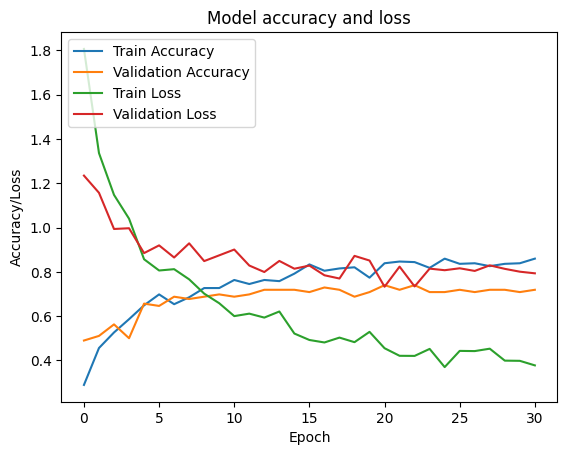

In [31]:
# Learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model accuracy and loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

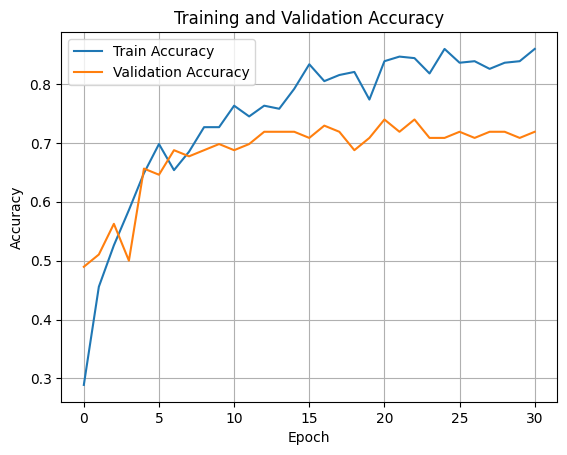

In [32]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Add a legend to specify which line is which
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

# Unfreeze Layers and Fine-Tune the Model

In [16]:
# # Unfreeze the last few layers and fine-tune the model
# unfreeze_layers = 3  # Unfreeze the last 3 layers
# for layer in model.layers[-unfreeze_layers:]:
#     layer.trainable = True

# # Recompile the model
# model.compile(optimizer=Adam(learning_rate=best_learning_rate / 10),  # Lower learning rate for fine-tuning
#               loss=CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [17]:
# # Fine-tune the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=50,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size,
#     callbacks=[checkpoint, early_stopping, reduce_lr],
#     class_weight=class_weights
# )

# # Save the fine-tuned model
# model.save(model_file)

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 1.3051 - accuracy: 0.4193
Epoch 1: val_loss improved from 1.33431 to 0.94323, saving model to vit_brain_mri.keras
24/24 [==============================] - 56s 637ms/step - loss: 1.3051 - accuracy: 0.4193 - val_loss: 0.9432 - val_accuracy: 0.6875 - lr: 9.5138e-05
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 0.8554 - accuracy: 0.6042
Epoch 2: val_loss improved from 0.94323 to 0.62421, saving model to vit_brain_mri.keras
24/24 [==============================] - 13s 522ms/step - loss: 0.8554 - accuracy: 0.6042 - val_loss: 0.6242 - val_accuracy: 0.7917 - lr: 9.5138e-05
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 0.7064 - accuracy: 0.6875
Epoch 3: val_loss improved from 0.62421 to 0.48041, saving model to vit_brain_mri.keras
24/24 [==============================] - 13s 525ms/step - loss: 0.7064 - accuracy: 0.6875 - val_loss: 0.4804 - val_accuracy: 0.8438 - lr: 9.5138e-05
Epoch 4

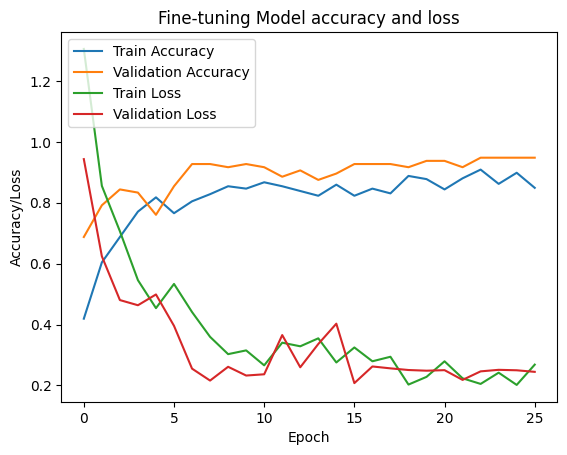

In [18]:
# # Plotting the fine-tuning training history
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Fine-tuning Model accuracy and loss')
# plt.ylabel('Accuracy/Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], loc='upper left')
# plt.show()

In [19]:
# # Plotting training and validation accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
# plt.title('Training and Validation Accuracy')  # Title of the plot
# plt.xlabel('Epoch')  # X-axis label
# plt.ylabel('Accuracy')  # Y-axis label
# plt.legend()  # Add a legend to specify which line is which
# plt.grid(True)  # Add grid for better readability
# plt.show()  # Display the plot

6/6 [==============================] - 3s 101ms/step


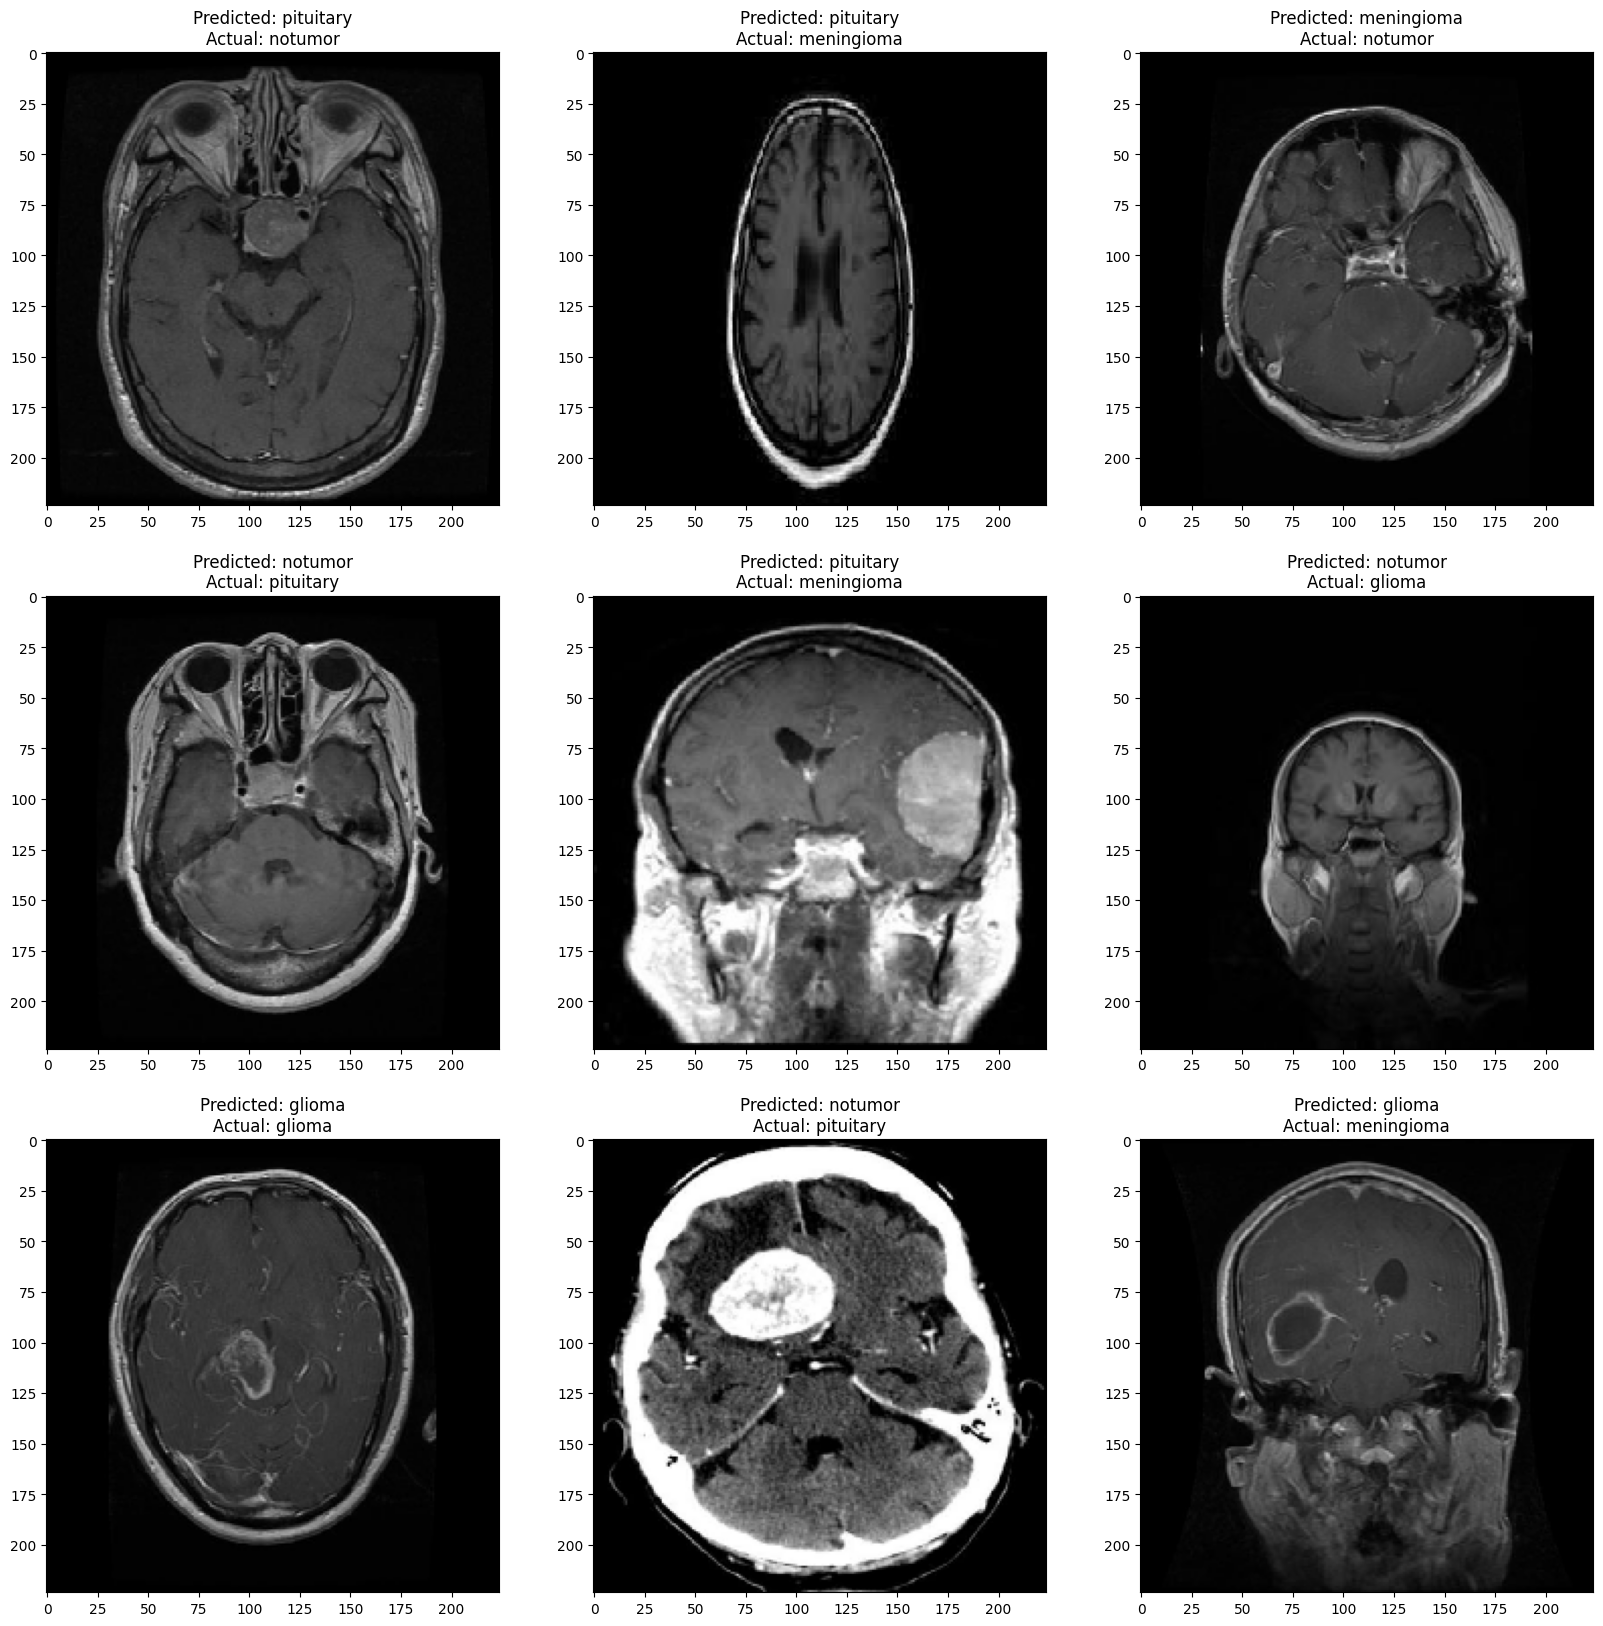

In [20]:
# # Validate the model with test data

# # loaded_model = keras.models.load_model(model_file, safe_mode=False)
# # loaded_model.evaluate(test_generator)

# # Validate and predict
# model = tf.keras.models.load_model(model_file, custom_objects={'VitLayer': vit.vit_b16}, compile=False, safe_mode=False)
# model.compile(optimizer=Adam(learning_rate=best_learning_rate),  # Recompile with the best learning rate
#               loss=CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


# # Evaluate the model
# model.evaluate(test_generator)

# # Predict the output
# predictions = model.predict(test_generator)
# predictions = np.argmax(predictions, axis=1)

# # Predict and Display image using matplotlib
# plt.figure(figsize=(20, 20))
# for i in range(9):
#     plt.subplot(3, 3, i + 1)
#     for X_batch, Y_batch in test_generator:
#         image = X_batch[0]
#         # Print Class
#         plt.title("Predicted: " + classes[predictions[i]] + "\nActual: " + classes[np.argmax(Y_batch[i])])

#         plt.imshow(image)
#         break

**Model Visualisation (Evaluation)**

6/6 [==============================] - 4s 104ms/step


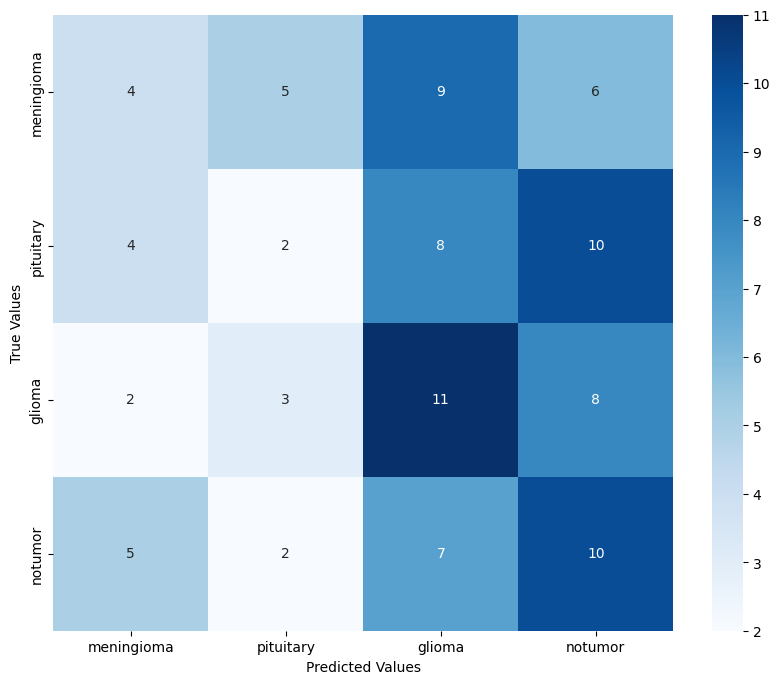

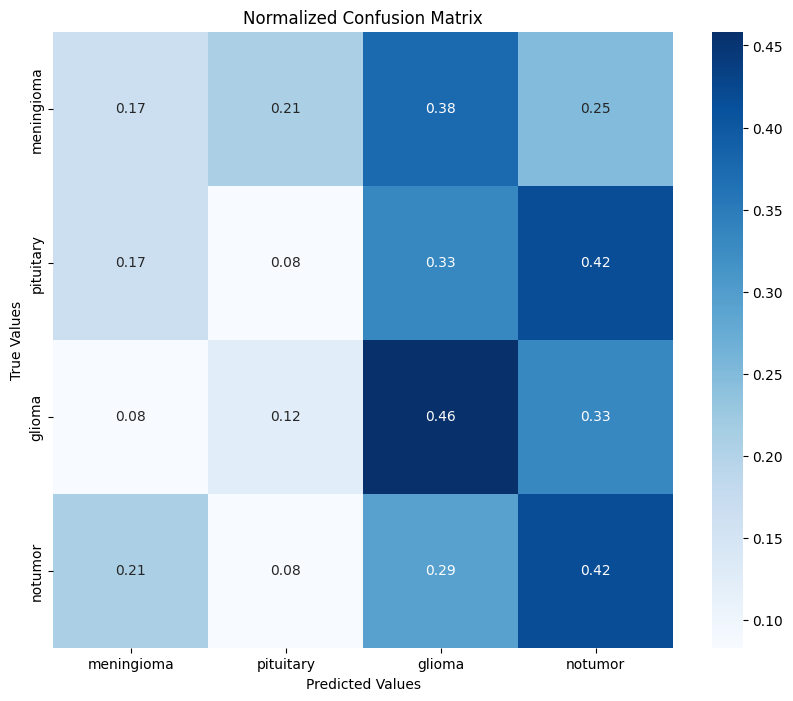

DSC: 0.258487064594604, Sensitivity: 0.28125, Specificity: 0.7604166666666666, Accuracy: 0.28125


In [33]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(test_generator.classes, predictions)
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.xlabel('Predicted Values')
# plt.ylabel('True Values');


import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

classes = ['meningioma', 'pituitary', 'glioma', 'notumor']

def calculate_metrics(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.show()

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the normalized confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    # Calculate metrics for each class and average them
    dsc = np.mean([2.0 * cm[i, i] / (np.sum(cm[i, :]) + np.sum(cm[:, i])) for i in range(cm.shape[0])])
    sensitivity = np.mean([cm[i, i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])
    specificity = np.mean([np.sum(np.delete(np.delete(cm, j, 0), j, 1)) / np.sum(np.delete(cm, j, 0)) for j in range(cm.shape[0])])

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    return dsc, sensitivity, specificity, accuracy

# Predict the output
predictions_prob = model.predict(test_generator)
predictions = np.argmax(predictions_prob, axis=1)

dsc, sensitivity, specificity, accuracy = calculate_metrics(test_generator.classes, predictions)
print(f"DSC: {dsc}, Sensitivity: {sensitivity}, Specificity: {specificity}, Accuracy: {accuracy}")


# MLP

In [22]:
# from keras.optimizers import Adam
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Dense, Flatten
# from keras.utils import plot_model

# def create_mlp_model(input_shape, num_classes):
#     inputs = Input(input_shape)
#     x = Flatten()(inputs)
#     x = Dense(512, activation='relu')(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dense(128, activation='relu')(x)
#     outputs = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# num_classes = os.listdir(dir)

# # Create a new model
# model = create_mlp_model((256, 256, 3), len(num_classes))

# plot_model(model, to_file= 'model.png', show_shapes=True, show_layer_names=True)

# model.summary()

In [23]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# # Define callbacks
# checkpoint = ModelCheckpoint(model_file, monitor='val_loss', verbose=1, save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

# # Fit the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=50,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size,
#     callbacks=[checkpoint, early_stopping]
# )

In [24]:
# # Learning curve
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

# # Loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation','Loss', 'Value Loss'], loc='upper left')
# plt.show()

# Custom CNN Model

In [25]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# def create_cnn_model(input_shape, num_classes):
#     inputs = Input(shape=input_shape)

#     # Block 1
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Block 2
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Block 3
#     x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Block 4
#     x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Fully connected layers
#     x = Flatten()(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     outputs = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# # Example usage
# input_shape = (512, 512, 3)  # Example input shape for your images
# num_classes = 4  # Example number of classes (e.g., pituitary, glioma, meningioma, notumor)
# model = create_cnn_model(input_shape, num_classes)

# # Display model summary
# model.summary()

In [26]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# history = model.fit(
#     train_generator,
#     epochs=50,
#     validation_data=validation_generator,
#     callbacks=[early_stopping, reduce_lr]
# )

In [27]:
# # Learning curve
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

# # Loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation','Loss', 'Value Loss'], loc='upper left')
# plt.show()